In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df_team = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv")
df_team_regularc = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MRegularSeasonCompactResults.csv")
df_team_detailedc = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MNCAATourneyDetailedResults.csv")
df_team_regular_sea = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv")

In [3]:
df_total = pd.concat([df_team, df_team_regularc, df_team_detailedc, df_team_regular_sea])

In [4]:
df_total.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1985,136,1116,63,1234,54,N,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,136,1120,59,1345,58,N,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985,136,1207,68,1250,43,N,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,136,1229,58,1425,55,N,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,136,1242,49,1325,38,N,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304296 entries, 0 to 113240
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Season   304296 non-null  int64  
 1   DayNum   304296 non-null  int64  
 2   WTeamID  304296 non-null  int64  
 3   WScore   304296 non-null  int64  
 4   LTeamID  304296 non-null  int64  
 5   LScore   304296 non-null  int64  
 6   WLoc     304296 non-null  object 
 7   NumOT    304296 non-null  int64  
 8   WFGM     114556 non-null  float64
 9   WFGA     114556 non-null  float64
 10  WFGM3    114556 non-null  float64
 11  WFGA3    114556 non-null  float64
 12  WFTM     114556 non-null  float64
 13  WFTA     114556 non-null  float64
 14  WOR      114556 non-null  float64
 15  WDR      114556 non-null  float64
 16  WAst     114556 non-null  float64
 17  WTO      114556 non-null  float64
 18  WStl     114556 non-null  float64
 19  WBlk     114556 non-null  float64
 20  WPF      114556 non-null  float

In [10]:
# Recalculating skewness for the transformed features
transformed_skewness = df_total[['WScore', 'WFGM']].skew()

# Plotting histograms for the transformed features
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

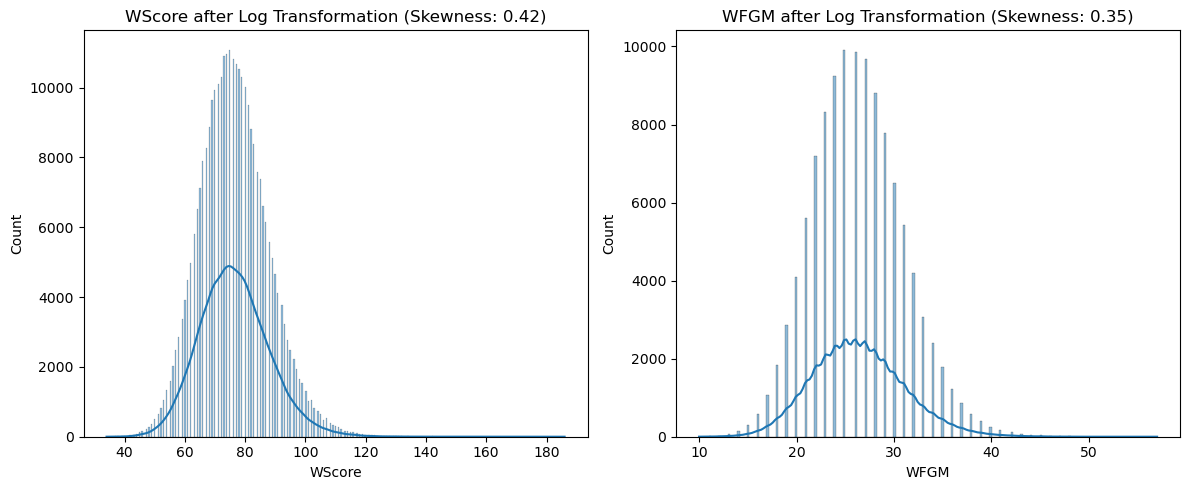

WScore    0.424306
WFGM      0.346475
dtype: float64

In [11]:
# Plotting histograms for the transformed features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_total['WScore'], kde=True)
plt.title(f'WScore after Log Transformation (Skewness: {transformed_skewness["WScore"]:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(df_total['WFGM'], kde=True)
plt.title(f'WFGM after Log Transformation (Skewness: {transformed_skewness["WFGM"]:.2f})')

plt.tight_layout()
plt.show()

transformed_skewness

In [12]:
pd.read_csv('df_total.csv')

,Unnamed: 0,Season,WTeamID,WScore,LTeamID,LScore,DayNum,WLoc,NumOT,WFGM,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,0,1985,1116,63,1234,54,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1985,1120,59,1345,58,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1985,1207,68,1250,43,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1985,1229,58,1425,55,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1985,1242,49,1325,38,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304291,113236,2024,1120,86,1196,67,132.0,N,0.0,31.0,...,13.0,18.0,25.0,13.0,26.0,9.0,11.0,8.0,6.0,17.0
304292,113237,2024,1182,57,1433,51,132.0,N,0.0,17.0,...,24.0,12.0,14.0,9.0,25.0,9.0,16.0,10.0,9.0,16.0
304293,113238,2024,1228,93,1458,87,132.0,N,0.0,30.0,...,20.0,20.0,23.0,13.0,17.0,17.0,7.0,7.0,1.0,20.0
304294,113239,2024,1412,85,1396,69,132.0,N,0.0,31.0,...,21.0,14.0,17.0,11.0,26.0,17.0,14.0,6.0,6.0,18.0
